In [ ]:
import tensorflow as tf
# from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd



# Preprocess

In [ ]:
df = pd.read_csv('transaction_dataset.csv')

data = df.drop(columns=['Unnamed: 0','Index', 'Address'])

# one-hot encoding
char_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=char_cols)
# label_encoder = LabelEncoder()
# for col in char_cols:
#   data[col] = label_encoder.fit_transform(data[col])

# Fill missing data with 0
data = data.fillna(0)

num_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('FLAG')

# Data Normlization
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

X = data.drop(columns=['FLAG'])
y = data['FLAG']


# Model

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def cross_validate_model(X, y, build_model_fn, n_splits=5, smote=True, epochs=10, batch_size=32):
  kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
  fold_no = 1
  acc_per_fold = []
  loss_per_fold = []
  histories = []

  for train_index, val_index in kf.split(X):
    print(f"Training on fold {fold_no}...")

    # Split data for this fold
    X_train = X.iloc[train_index]
    X_val = X.iloc[val_index]
    y_train = y.iloc[train_index]
    y_val = y.iloc[val_index]


    # Apply SMOTE if required
    if smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    # Build the model
    model = build_model_fn()

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), verbose=1)
    histories.append(history.history)

    # Evaluate the model
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    acc_per_fold.append(val_acc)
    loss_per_fold.append(val_loss)

    # Confusion matrix
    # y_pred = (model.predict(X_val) > 0.5).astype("int32")
    # cm = confusion_matrix(y_val, y_pred)
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
    #             xticklabels=['Normal', 'Fraud'],
    #             yticklabels=['Normal', 'Fraud'])
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted Label')
    # plt.ylabel('True Label')
    # plt.show()

    fold_no += 1

  # Plot accuracy over epochs for the 5th fold
  plt.plot(histories[4]['accuracy'], label='Train Accuracy')
  plt.plot(histories[4]['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy over Epochs (Fold 5)')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  # Plot loss over epochs for one of the fold (5th fold)
  plt.plot(histories[4]['loss'], label='Train Loss')
  plt.plot(histories[4]['val_loss'], label='Validation Loss')
  plt.title('Loss over Epochs (Fold 5)')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Return average results
  return {
      "average_accuracy": np.mean(acc_per_fold),
      "average_loss": np.mean(loss_per_fold),
      "std_accuracy": np.std(acc_per_fold),
      "std_loss": np.std(loss_per_fold)
  }



In [ ]:
def fcn_model_0(): # base model
  model = Sequential()
  model.add(Dense(4, activation='relu'))  # Input layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# more neuron per layer
def fcn_model_1():
  model = Sequential()
  model.add(Dense(128, activation='relu'))  # Input layer
  model.add(Dense(128, activation='relu'))  # Hidden layer
  model.add(Dense(128, activation='relu'))  # Hidden layer
  model.add(Dense(128, activation='relu'))  # Hidden layer
  model.add(Dense(128, activation='relu'))  # Hidden layer
  model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# more number of layer
def fcn_model_2():
  model = Sequential()
  model.add(Dense(4, activation='relu'))  # Input layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# with sgd optimizer
def fcn_model_3():
  model = Sequential()
  model.add(Dense(4, activation='relu'))  # Input layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(4, activation='relu'))  # Hidden layer
  model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model


# Train

Training on fold 1...
Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7170 - loss: 0.6033 - val_accuracy: 0.9777 - val_loss: 0.1442
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9816 - loss: 0.2042 - val_accuracy: 0.9736 - val_loss: 0.0812
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9898 - loss: 0.0706 - val_accuracy: 0.9736 - val_loss: 0.0754
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9919 - loss: 0.0320 - val_accuracy: 0.9807 - val_loss: 0.0668
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9920 - loss: 0.0278 - val_accuracy: 0.9731 - val_loss: 0.0903
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0240 - val_accuracy: 0.9858 - val_loss: 0.0484
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9969 - loss: 0.0136 - val_accuracy: 0.9837 - val_loss: 0.0573
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9974 - loss: 0.

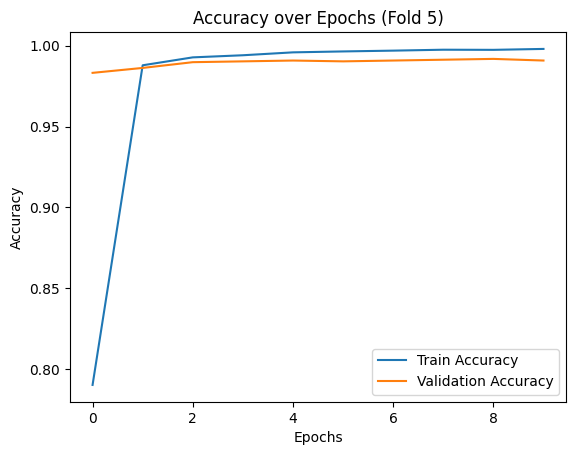

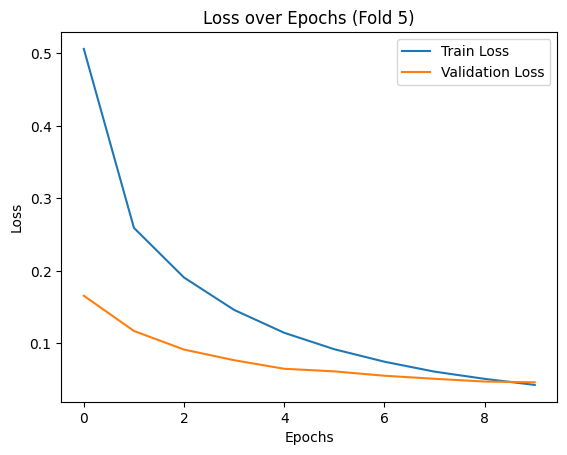

Results for Model V0: {'average_accuracy': 0.9867903351783752, 'average_loss': 0.06737379878759384, 'std_accuracy': 0.002548414422586098, 'std_loss': 0.013969511564091144}


In [ ]:
# base model
results_v0 = cross_validate_model(X, y, fcn_model_0, n_splits=5, epochs=10, batch_size=32)
print("Results for Model V0:", results_v0)

Training on fold 1...
Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9514 - loss: 0.1979 - val_accuracy: 0.9837 - val_loss: 0.0640
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9900 - loss: 0.0279 - val_accuracy: 0.9904 - val_loss: 0.0384
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9976 - loss: 0.0107 - val_accuracy: 0.9822 - val_loss: 0.0726
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9970 - loss: 0.0088 - val_accuracy: 0.9904 - val_loss: 0.0383
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9985 - loss: 0.0064 - val_accuracy: 0.9898 - val_loss: 0.0358
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9974 - loss: 0.0077 - val_accuracy: 0.9868 - val_loss: 0.0559
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9981 - loss: 0.0063 - val_accuracy: 0.9898 - val_loss: 0.0359
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9986 - loss: 0.0

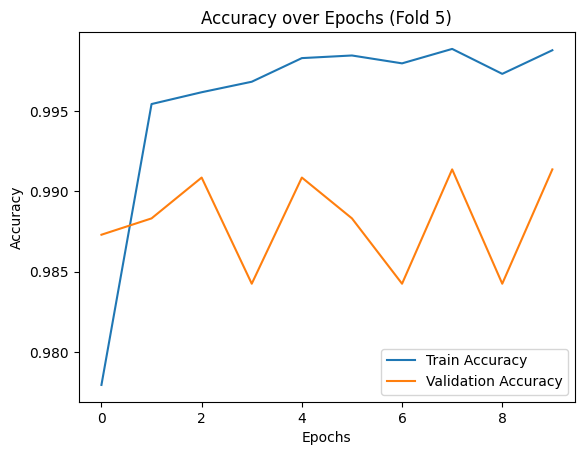

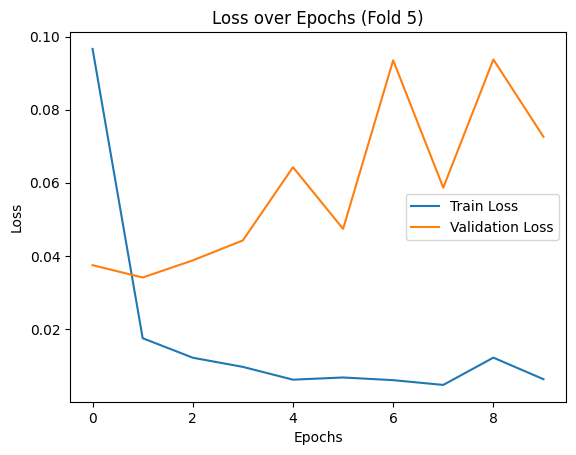

Results for Model V1: {'average_accuracy': 0.9887206077575683, 'average_loss': 0.06255625560879707, 'std_accuracy': 0.0019656894761412693, 'std_loss': 0.01220941449638594}


In [ ]:
results_v1 = cross_validate_model(X, y, fcn_model_1, n_splits=5, epochs=10, batch_size=32)
print("Results for Model V1:", results_v1)

Training on fold 1...
Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6321 - loss: 0.6141 - val_accuracy: 0.9787 - val_loss: 0.1591
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9822 - loss: 0.2382 - val_accuracy: 0.9802 - val_loss: 0.0593
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9879 - loss: 0.0429 - val_accuracy: 0.9797 - val_loss: 0.0676
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9922 - loss: 0.0320 - val_accuracy: 0.9837 - val_loss: 0.0601
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9943 - loss: 0.0209 - val_accuracy: 0.9837 - val_loss: 0.0566
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9948 - loss: 0.0222 - val_accuracy: 0.9827 - val_loss: 0.0643
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0140 - val_accuracy: 0.9863 - val_loss: 0.0588
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9975 - loss: 0.

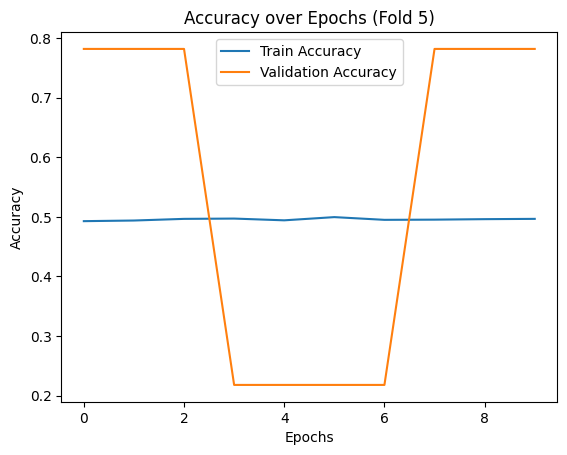

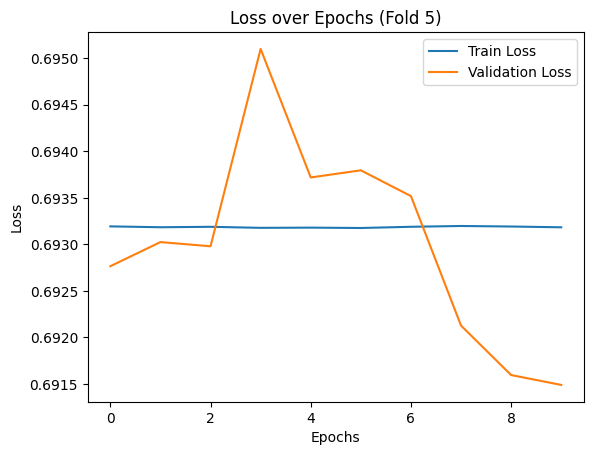

Results for Model V2: {'average_accuracy': 0.9439042091369629, 'average_loss': 0.20712296813726425, 'std_accuracy': 0.08097872462554521, 'std_loss': 0.24396820942468267}


In [ ]:
results_v2 = cross_validate_model(X, y, fcn_model_2, n_splits=5, epochs=10, batch_size=32)
print("Results for Model V2:", results_v2)

Training on fold 1...
Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6548 - loss: 0.6786 - val_accuracy: 0.8847 - val_loss: 0.5227
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8713 - loss: 0.5090 - val_accuracy: 0.9578 - val_loss: 0.2083
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.2885 - val_accuracy: 0.9660 - val_loss: 0.1420
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.2062 - val_accuracy: 0.9624 - val_loss: 0.1227
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9671 - loss: 0.1688 - val_accuracy: 0.9639 - val_loss: 0.1108
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.1420 - val_accuracy: 0.9589 - val_loss: 0.1121
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9754 - loss: 0.1259 - val_accuracy: 0.9670 - val_loss: 0.0935
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.1

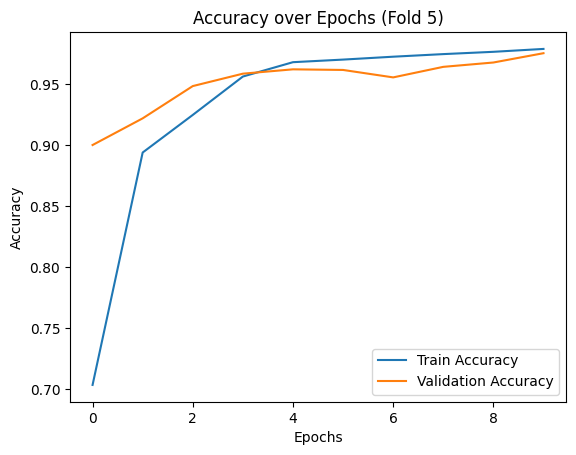

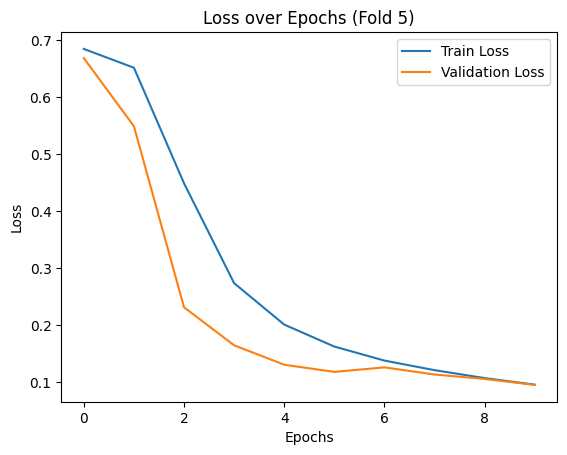

Results for Model V3: {'average_accuracy': 0.9790676832199097, 'average_loss': 0.07202385216951371, 'std_accuracy': 0.003790896940491139, 'std_loss': 0.014958904856574974}


In [ ]:
# with sgd optimizer
results_v3 = cross_validate_model(X, y, fcn_model_3, n_splits=5, epochs=10, batch_size=32)
print("Results for Model V3:", results_v3)

Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5863 - loss: 0.6914 - val_accuracy: 0.9426 - val_loss: 0.6701
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9299 - loss: 0.6644 - val_accuracy: 0.9660 - val_loss: 0.6140
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9583 - loss: 0.5820 - val_accuracy: 0.9629 - val_loss: 0.5076
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9711 - loss: 0.4072 - val_accuracy: 0.9624 - val_loss: 0.3715
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9724 - loss: 0.2600 - val_accuracy: 0.9705 - val_loss: 0.2692
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9796 - loss: 0.1772 - val_accuracy: 0.9761 - val_loss: 0.1929
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9829 - loss: 0.1251 - val_accuracy: 0.9771 - val_loss: 0.1332
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9859 - loss: 0.0864 - val_ac

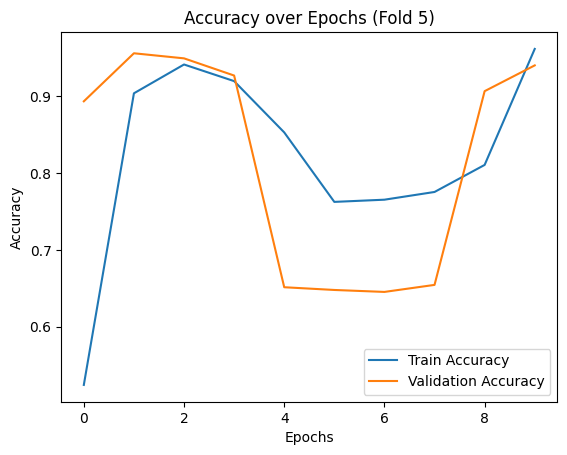

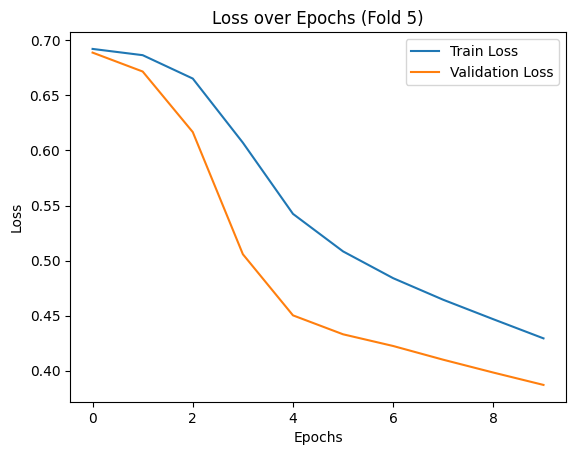

Results for Model V4: {'average_accuracy': 0.974696934223175, 'average_loss': 0.1855644851922989, 'std_accuracy': 0.017607024942624387, 'std_loss': 0.16233037489147029}


In [ ]:
# with larger batch size
results_v4 = cross_validate_model(X, y, fcn_model_0, n_splits=5, epochs=10, batch_size=256)
print("Results for Model V4:", results_v4)

Training on fold 1...
Epoch 1/10
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8500 - loss: 0.3072 - val_accuracy: 0.9832 - val_loss: 0.0479
Epoch 2/10
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0333 - val_accuracy: 0.9863 - val_loss: 0.0379
Epoch 3/10
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accuracy: 0.9837 - val_loss: 0.0494
Epoch 4/10
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9956 - loss: 0.0156 - val_accuracy: 0.9873 - val_loss: 0.0394
Epoch 5/10
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.9797 - val_loss: 0.0569
Epoch 6/10
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 0.9873 - val_loss: 0.0418
Epoch 7/10
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9974 - loss: 0.0098 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 8/10
1530/1530 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.

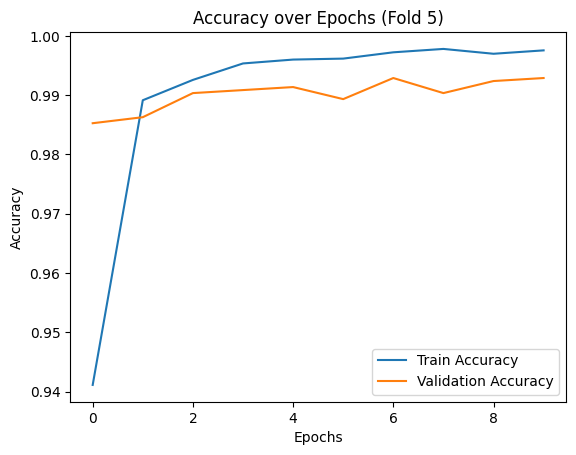

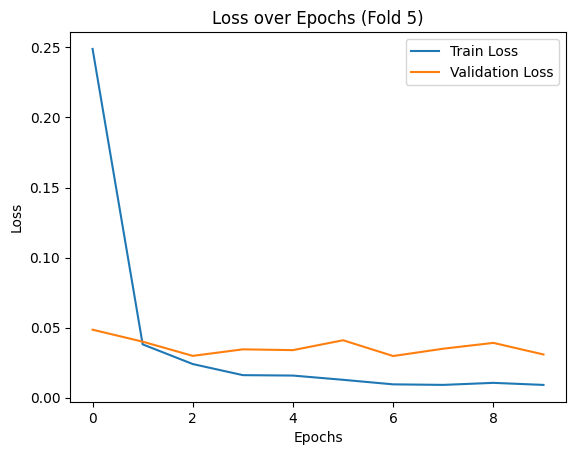

Results for Model V5: {'average_accuracy': 0.983132517337799, 'average_loss': 0.06384635306894779, 'std_accuracy': 0.006395748063584756, 'std_loss': 0.02012398418364046}


In [ ]:
# with smaller batch size
results_v5 = cross_validate_model(X, y, fcn_model_0, n_splits=5, epochs=10, batch_size=8)
print("Results for Model V5:", results_v5)

# to be trained

In [ ]:
# control group model
def fcn_model():
  model = Sequential()
  model.add(Dense(64, activation='relu'))  # Input layer
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))  # Hidden layer
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))  # Hidden layer
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))  # Hidden layer
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(64, activation='relu'))  # Hidden layer
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


Training on fold 1...
Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8378 - loss: 0.3681 - val_accuracy: 0.9670 - val_loss: 0.1059
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9560 - loss: 0.1251 - val_accuracy: 0.9792 - val_loss: 0.0770
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9688 - loss: 0.0911 - val_accuracy: 0.9832 - val_loss: 0.0773
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9801 - loss: 0.0622 - val_accuracy: 0.9797 - val_loss: 0.0809
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9847 - loss: 0.0511 - val_accuracy: 0.9787 - val_loss: 0.0898
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9864 - loss: 0.0473 - val_accuracy: 0.9802 - val_loss: 0.0709
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9838 - loss: 0.0497 - val_accuracy: 0.9822 - val_loss: 0.0570
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9891 - loss: 0.

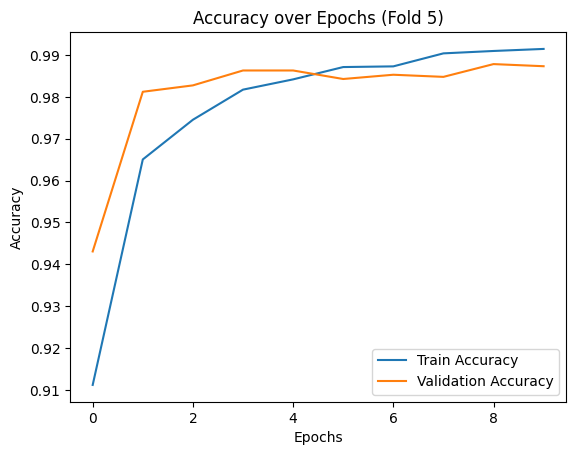

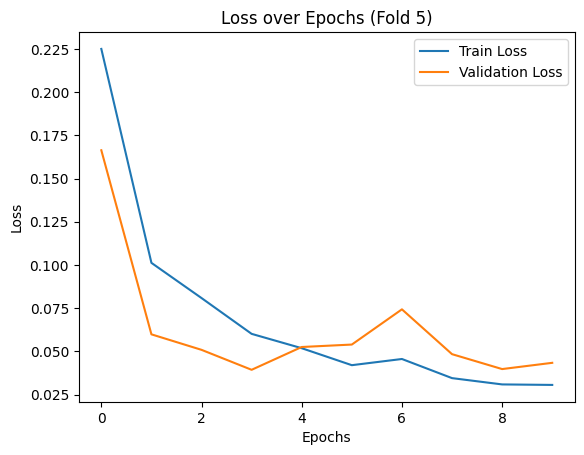

Results for tuned model: {'average_accuracy': 0.987602972984314, 'average_loss': 0.04991093352437019, 'std_accuracy': 0.0013852119253957948, 'std_loss': 0.007095669591432491}


In [ ]:
# model
results = cross_validate_model(X, y, fcn_model, n_splits=5, epochs=10, batch_size=32)
print("Results for tuned model:", results)

# Grid search

Testing parameters: {'batch_size': 256, 'dropout_rate': 0, 'layers': 5, 'neurons': 128, 'optimizer': 'adam'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9134 - loss: 0.2135 - val_accuracy: 0.9350 - val_loss: 0.5829
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9868 - loss: 0.0355 - val_accuracy: 0.9223 - val_loss: 0.4818
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9946 - loss: 0.0199 - val_accuracy: 0.9802 - val_loss: 0.3180
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9937 - loss: 0.0176 - val_accuracy: 0.9015 - val_loss: 0.2837
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9807 - val_loss: 0.1238
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9953 - loss: 0.0171 - val_accuracy: 0.9878 - val_loss: 0.0537
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.984

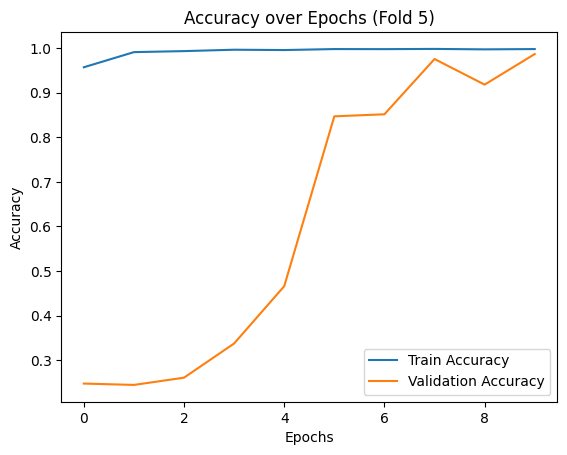

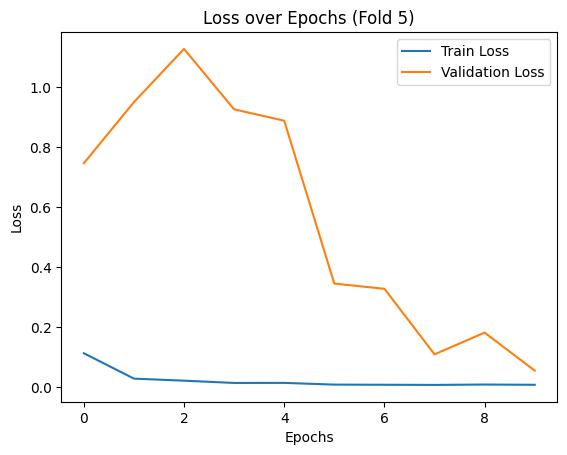

Average accuracy: 0.9870947957038879
Average loss: 0.06370101273059844
Testing parameters: {'batch_size': 256, 'dropout_rate': 0, 'layers': 5, 'neurons': 128, 'optimizer': 'sgd'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8690 - loss: 0.3257 - val_accuracy: 0.8710 - val_loss: 0.6541
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9599 - loss: 0.1138 - val_accuracy: 0.8756 - val_loss: 0.5981
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9669 - loss: 0.0927 - val_accuracy: 0.8898 - val_loss: 0.5259
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9748 - loss: 0.0719 - val_accuracy: 0.9685 - val_loss: 0.4350
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9792 - loss: 0.0607 - val_accuracy: 0.9721 - val_loss: 0.3362
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9812 - loss: 0.0556 - val_accuracy: 0.9787 - val_loss: 0.2616
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━

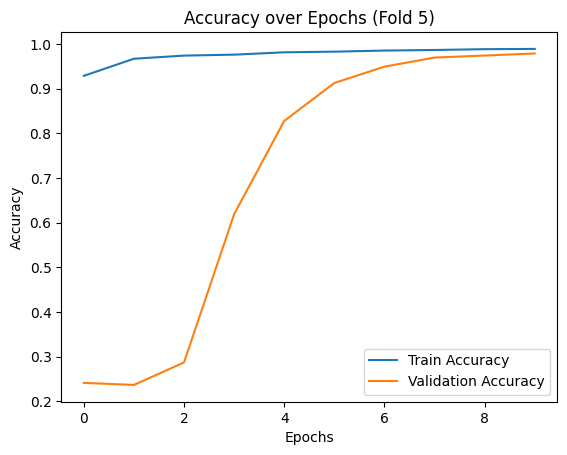

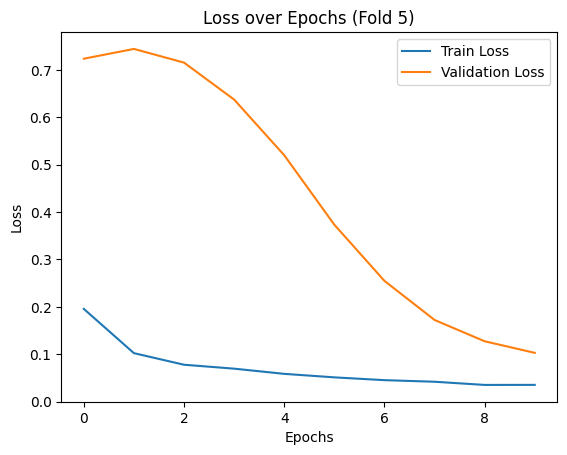

Average accuracy: 0.9787621378898621
Average loss: 0.0963015764951706
Testing parameters: {'batch_size': 256, 'dropout_rate': 0, 'layers': 10, 'neurons': 128, 'optimizer': 'adam'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8501 - loss: 0.3033 - val_accuracy: 0.2235 - val_loss: 0.7894
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9704 - loss: 0.0775 - val_accuracy: 0.2357 - val_loss: 1.1570
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9842 - loss: 0.0401 - val_accuracy: 0.3535 - val_loss: 0.9032
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9904 - loss: 0.0301 - val_accuracy: 0.6252 - val_loss: 0.7070
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9925 - loss: 0.0227 - val_accuracy: 0.7349 - val_loss: 0.8160
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.8273 - val_loss: 0.5308
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━

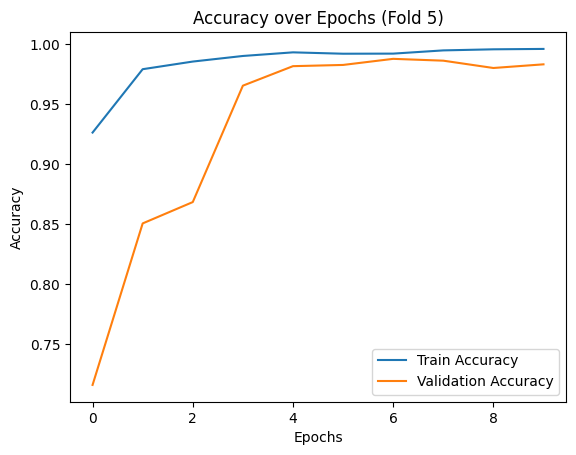

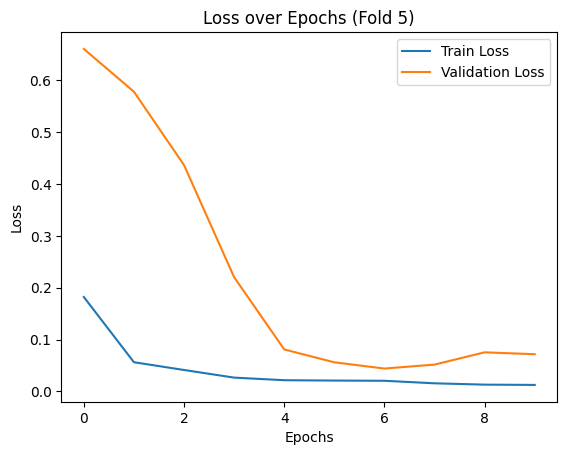

Average accuracy: 0.9818112254142761
Average loss: 0.08411694094538688
Testing parameters: {'batch_size': 256, 'dropout_rate': 0, 'layers': 10, 'neurons': 128, 'optimizer': 'sgd'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8020 - loss: 0.4267 - val_accuracy: 0.7831 - val_loss: 0.6467
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9377 - loss: 0.1559 - val_accuracy: 0.7831 - val_loss: 0.5925
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9596 - loss: 0.1122 - val_accuracy: 0.7857 - val_loss: 0.5291
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9669 - loss: 0.0870 - val_accuracy: 0.8903 - val_loss: 0.4711
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9705 - loss: 0.0821 - val_accuracy: 0.8908 - val_loss: 0.4173
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9757 - loss: 0.0679 - val_accuracy: 0.8933 - val_loss: 0.3736
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━

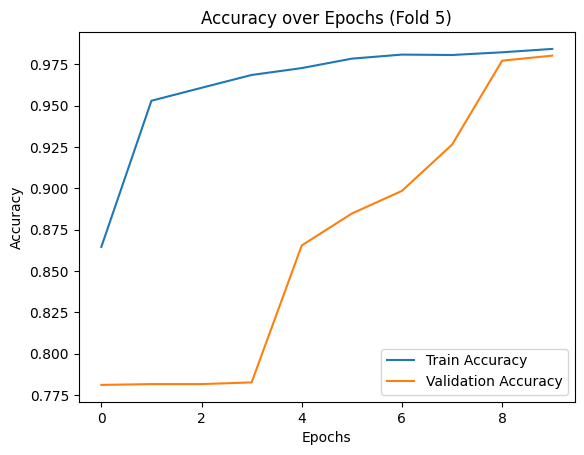

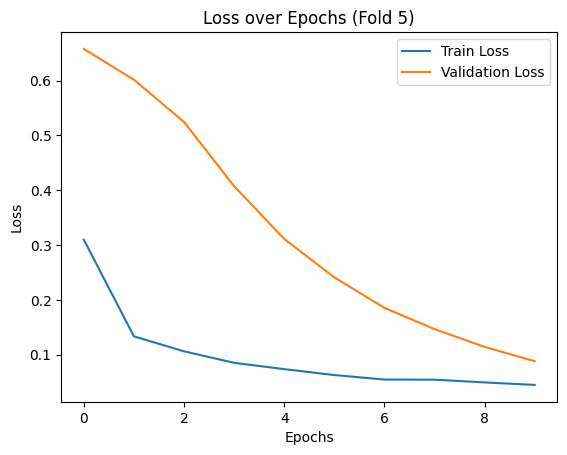

Average accuracy: 0.9643381118774415
Average loss: 0.09363621473312378
Testing parameters: {'batch_size': 256, 'dropout_rate': 0.1, 'layers': 5, 'neurons': 128, 'optimizer': 'adam'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8527 - loss: 0.3244 - val_accuracy: 0.8471 - val_loss: 0.5562
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9763 - loss: 0.0648 - val_accuracy: 0.9741 - val_loss: 0.3108
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9881 - loss: 0.0347 - val_accuracy: 0.9832 - val_loss: 0.1661
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9936 - loss: 0.0218 - val_accuracy: 0.9878 - val_loss: 0.0723
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9912 - loss: 0.0243 - val_accuracy: 0.9848 - val_loss: 0.0559
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.9893 - val_loss: 0.0331
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━

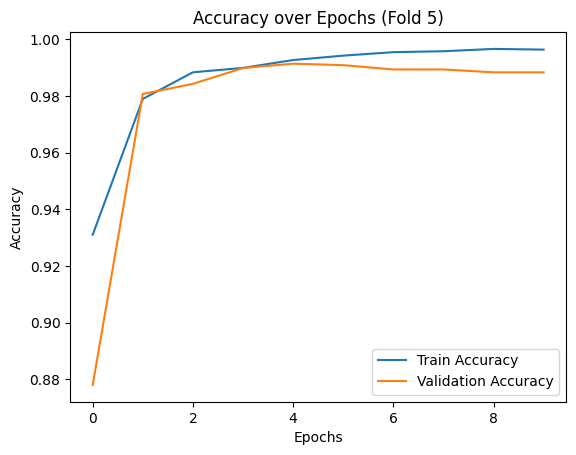

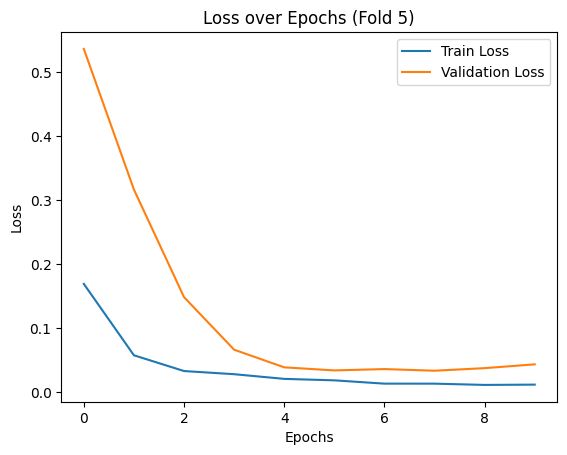

Average accuracy: 0.9871962666511536
Average loss: 0.05254858583211899
Testing parameters: {'batch_size': 256, 'dropout_rate': 0.1, 'layers': 5, 'neurons': 128, 'optimizer': 'sgd'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7581 - loss: 0.5126 - val_accuracy: 0.7831 - val_loss: 0.6106
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9320 - loss: 0.1943 - val_accuracy: 0.7836 - val_loss: 0.4959
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9399 - loss: 0.1582 - val_accuracy: 0.7831 - val_loss: 0.3712
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9529 - loss: 0.1298 - val_accuracy: 0.8720 - val_loss: 0.2777
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9607 - loss: 0.1111 - val_accuracy: 0.9599 - val_loss: 0.2014
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9666 - loss: 0.0980 - val_accuracy: 0.9726 - val_loss: 0.1382
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━

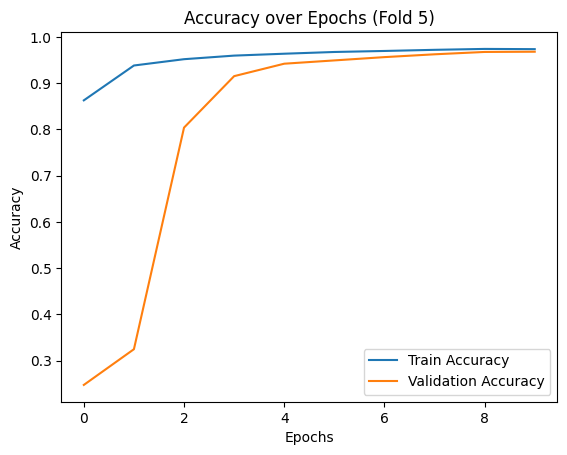

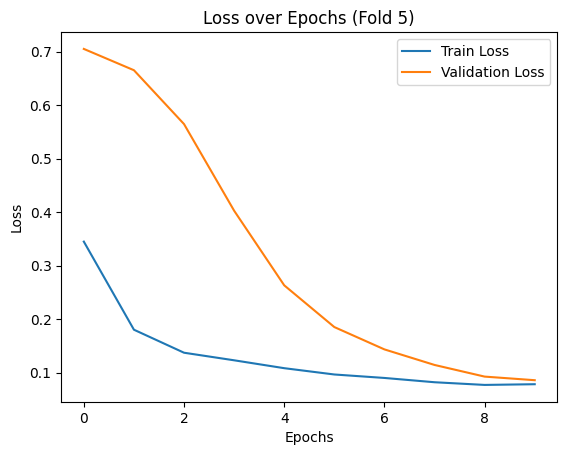

Average accuracy: 0.975814414024353
Average loss: 0.07645780220627785
Testing parameters: {'batch_size': 256, 'dropout_rate': 0.1, 'layers': 10, 'neurons': 128, 'optimizer': 'adam'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7275 - loss: 0.5210 - val_accuracy: 0.2392 - val_loss: 0.7768
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9529 - loss: 0.1256 - val_accuracy: 0.8141 - val_loss: 0.4734
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9759 - loss: 0.0755 - val_accuracy: 0.9264 - val_loss: 0.2783
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9821 - loss: 0.0564 - val_accuracy: 0.9832 - val_loss: 0.0668
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9878 - loss: 0.0366 - val_accuracy: 0.9731 - val_loss: 0.0791
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9877 - loss: 0.0355 - val_accuracy: 0.9761 - val_loss: 0.0759
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━

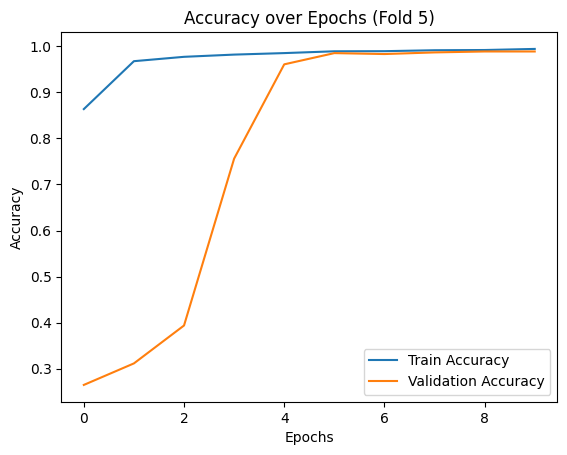

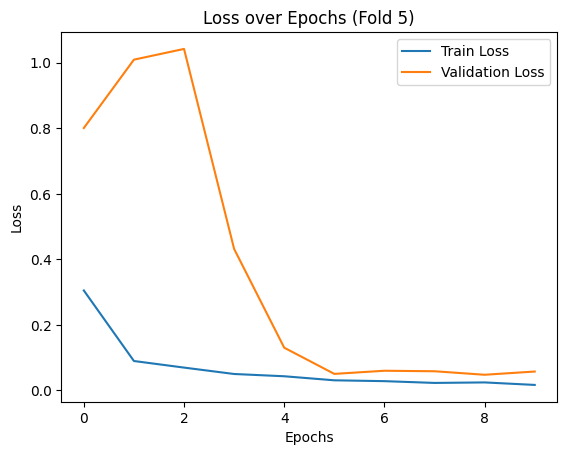

Average accuracy: 0.9854692459106446
Average loss: 0.07345071360468865
Testing parameters: {'batch_size': 256, 'dropout_rate': 0.1, 'layers': 10, 'neurons': 128, 'optimizer': 'sgd'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.6064 - loss: 0.7103 - val_accuracy: 0.2179 - val_loss: 0.7353
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8327 - loss: 0.3996 - val_accuracy: 0.2174 - val_loss: 0.7392
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8934 - loss: 0.2714 - val_accuracy: 0.6770 - val_loss: 0.6045
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9172 - loss: 0.2199 - val_accuracy: 0.8527 - val_loss: 0.4567
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9347 - loss: 0.1877 - val_accuracy: 0.9050 - val_loss: 0.3255
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9431 - loss: 0.1578 - val_accuracy: 0.9421 - val_loss: 0.1985
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━

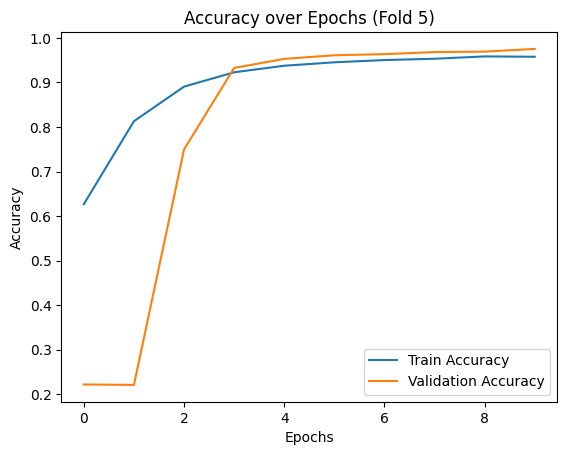

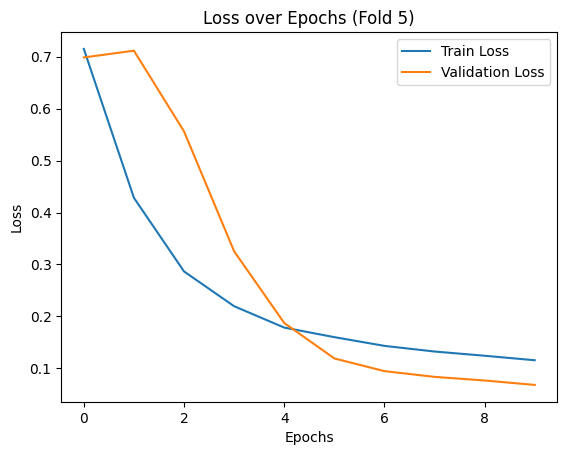

Average accuracy: 0.9524420261383056
Average loss: 0.14254980832338332
Testing parameters: {'batch_size': 256, 'dropout_rate': 0.2, 'layers': 5, 'neurons': 128, 'optimizer': 'adam'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8401 - loss: 0.3554 - val_accuracy: 0.8481 - val_loss: 0.4685
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9713 - loss: 0.0791 - val_accuracy: 0.9548 - val_loss: 0.2545
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9806 - loss: 0.0565 - val_accuracy: 0.9792 - val_loss: 0.1316
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9860 - loss: 0.0423 - val_accuracy: 0.9812 - val_loss: 0.0780
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9874 - loss: 0.0385 - val_accuracy: 0.9858 - val_loss: 0.0474
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9909 - loss: 0.0255 - val_accuracy: 0.9843 - val_loss: 0.0481
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━

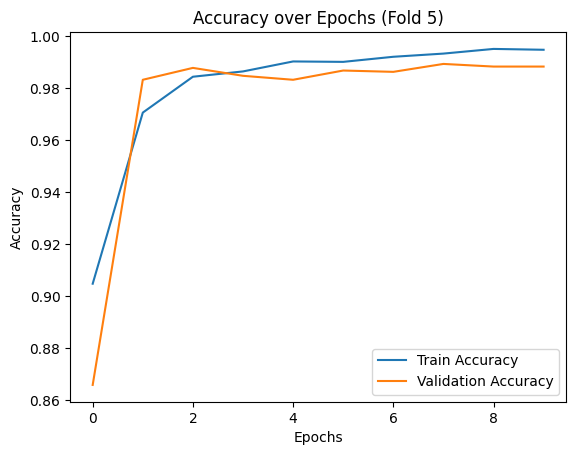

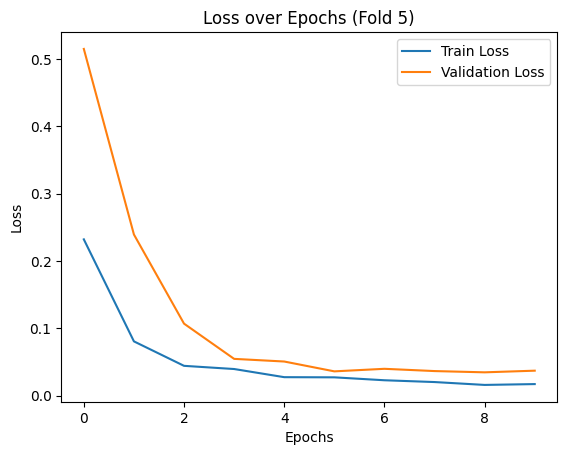

Average accuracy: 0.9872978448867797
Average loss: 0.04694470912218094
Testing parameters: {'batch_size': 256, 'dropout_rate': 0.2, 'layers': 5, 'neurons': 128, 'optimizer': 'sgd'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6916 - loss: 0.6119 - val_accuracy: 0.2291 - val_loss: 0.7161
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8943 - loss: 0.2989 - val_accuracy: 0.2367 - val_loss: 0.7109
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9283 - loss: 0.2184 - val_accuracy: 0.6831 - val_loss: 0.6199
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9372 - loss: 0.1759 - val_accuracy: 0.8517 - val_loss: 0.4679
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9458 - loss: 0.1542 - val_accuracy: 0.9182 - val_loss: 0.3232
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9542 - loss: 0.1396 - val_accuracy: 0.9380 - val_loss: 0.2290
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━

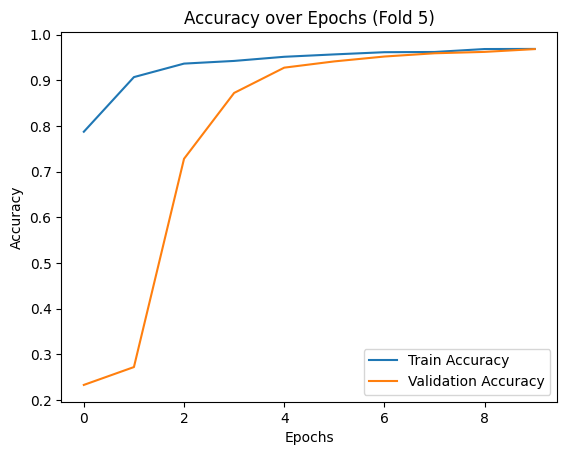

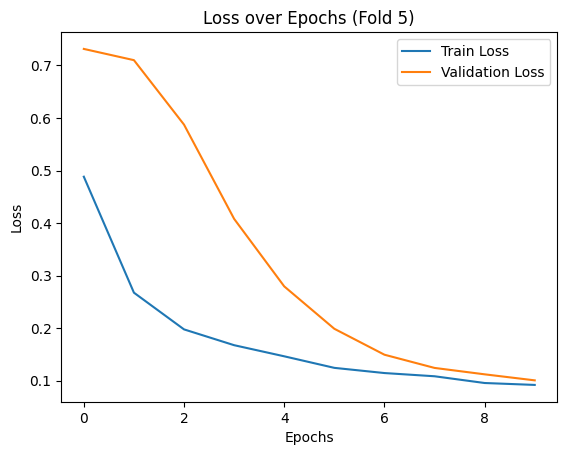

Average accuracy: 0.9726665258407593
Average loss: 0.08646847158670426
Testing parameters: {'batch_size': 256, 'dropout_rate': 0.2, 'layers': 10, 'neurons': 128, 'optimizer': 'adam'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.6220 - loss: 0.6884 - val_accuracy: 0.7400 - val_loss: 0.5836
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9272 - loss: 0.1987 - val_accuracy: 0.9259 - val_loss: 0.2218
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9602 - loss: 0.1190 - val_accuracy: 0.9639 - val_loss: 0.1087
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9678 - loss: 0.0877 - val_accuracy: 0.9756 - val_loss: 0.0721
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9788 - loss: 0.0643 - val_accuracy: 0.9817 - val_loss: 0.0530
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9817 - loss: 0.0573 - val_accuracy: 0.9812 - val_loss: 0.0681
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━

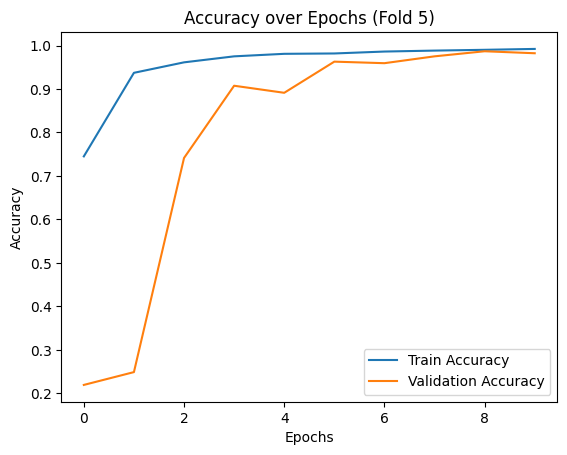

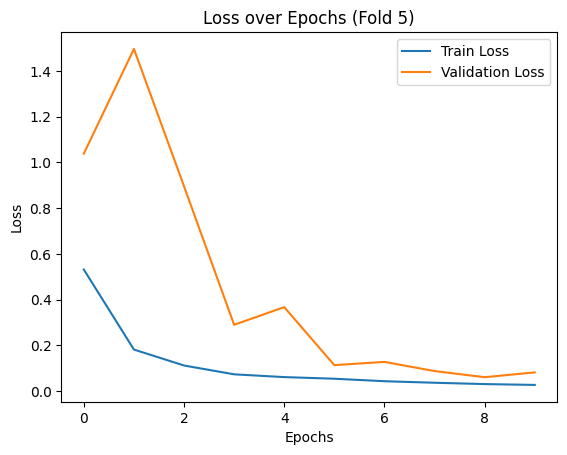

Average accuracy: 0.984859025478363
Average loss: 0.06387160941958428
Testing parameters: {'batch_size': 256, 'dropout_rate': 0.2, 'layers': 10, 'neurons': 128, 'optimizer': 'sgd'}
Training on fold 1...
Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5295 - loss: 0.8477 - val_accuracy: 0.2174 - val_loss: 0.7291
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6107 - loss: 0.6943 - val_accuracy: 0.2194 - val_loss: 0.8444
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7216 - loss: 0.5623 - val_accuracy: 0.2209 - val_loss: 1.0218
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8163 - loss: 0.4369 - val_accuracy: 0.2224 - val_loss: 1.1710
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8673 - loss: 0.3551 - val_accuracy: 0.3149 - val_loss: 1.0880
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8902 - loss: 0.3007 - val_accuracy: 0.6541 - val_loss: 0.8035
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━

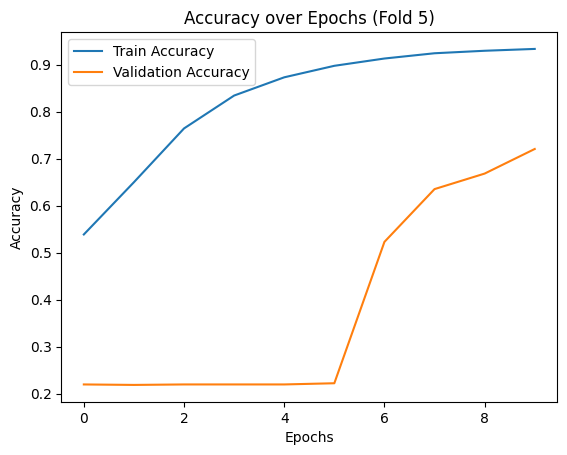

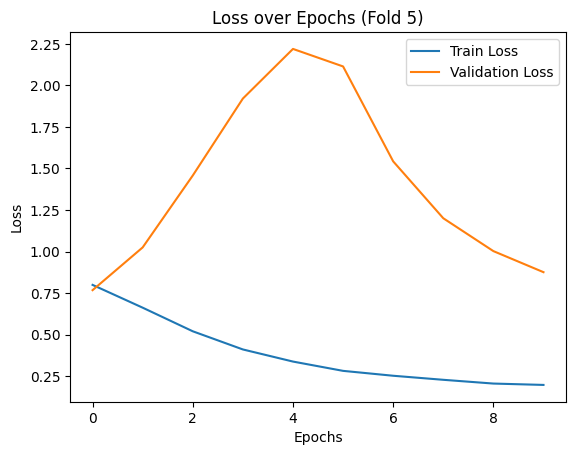

Average accuracy: 0.8511297583580018
Average loss: 0.46590193808078767
Best parameters: {'batch_size': 256, 'dropout_rate': 0.2, 'layers': 5, 'neurons': 128, 'optimizer': 'adam'}, Best accuracy: 0.9872978448867797


In [ ]:
param_grid = {
    'layers': [5, 10],  # Number of layers
    'neurons': [128],  # Number of neurons per layer
    'batch_size': [256],  # Batch size
    'optimizer': ['adam','sgd'],  # Optimizer
    'dropout_rate': [0, 0.1, 0.2]  # Dropout rate, midigate overfitting
}

def build_model_fn(layers=5, neurons=4, dropout_rate=0, optimizer='adam',batch_size = 64):
    model = Sequential()
    for _ in range(layers):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
        model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


from sklearn.model_selection import ParameterGrid
best_params = None
best_score = 0

for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")
    model_fn = lambda: build_model_fn(**params)
    results = cross_validate_model(X, y, model_fn, epochs=10, batch_size=params['batch_size'])
    print(f"Average accuracy: {results['average_accuracy']}")
    print(f"Average loss: {results['average_loss']}")

    if results['average_accuracy'] > best_score:
        best_score = results['average_accuracy']
        best_params = params

print(f"Best parameters: {best_params}, Best accuracy: {best_score}")


# Visual


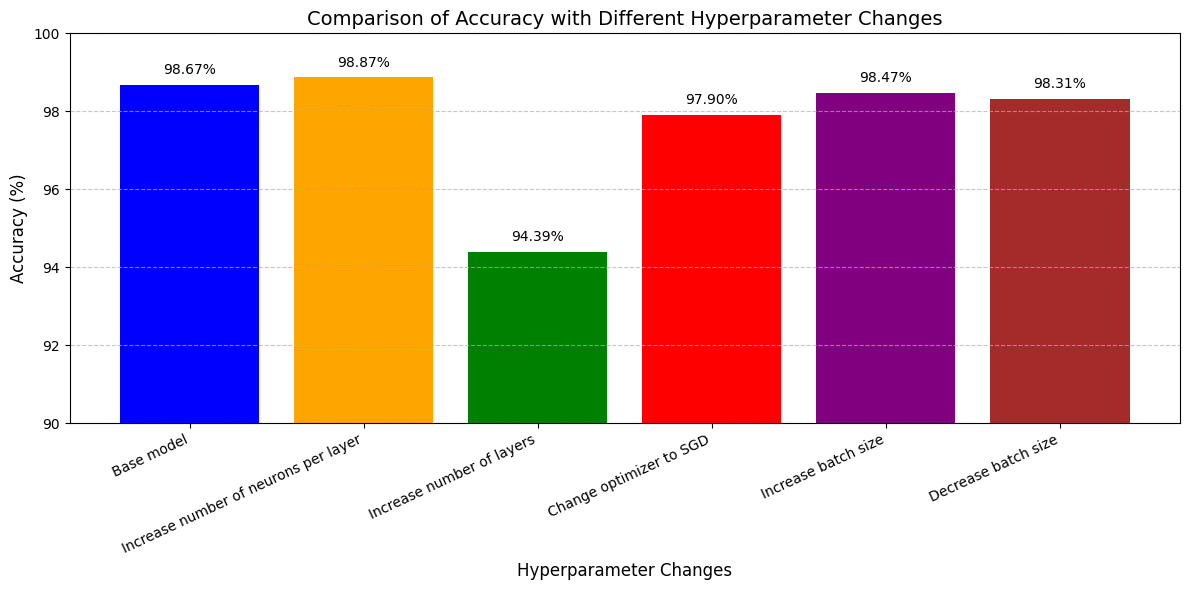

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
changes = [
    'Base model',
    'Increase number of neurons per layer',
    'Increase number of layers',
    'Change optimizer to SGD',
    'Increase batch size',
    'Decrease batch size'
]
accuracies = [98.67, 98.87, 94.39, 97.90, 98.47, 98.31]

# Creating the bar chart
plt.figure(figsize=(12, 6))  # Adjusted for better readability
bars = plt.bar(changes, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Set y-axis limit with space above the bars
plt.ylim(90, 100)

# Add chart labels and title
plt.title('Comparison of Accuracy with Different Hyperparameter Changes', fontsize=14)
plt.xlabel('Hyperparameter Changes', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=25, fontsize=10, ha='right')

# Add a grid for better visual alignment
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentages on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        yval + 0.2,  # Add space above the bar for the text
        f'{yval:.2f}%',  # Format to two decimal places
        ha='center', va='bottom', fontsize=10
    )

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


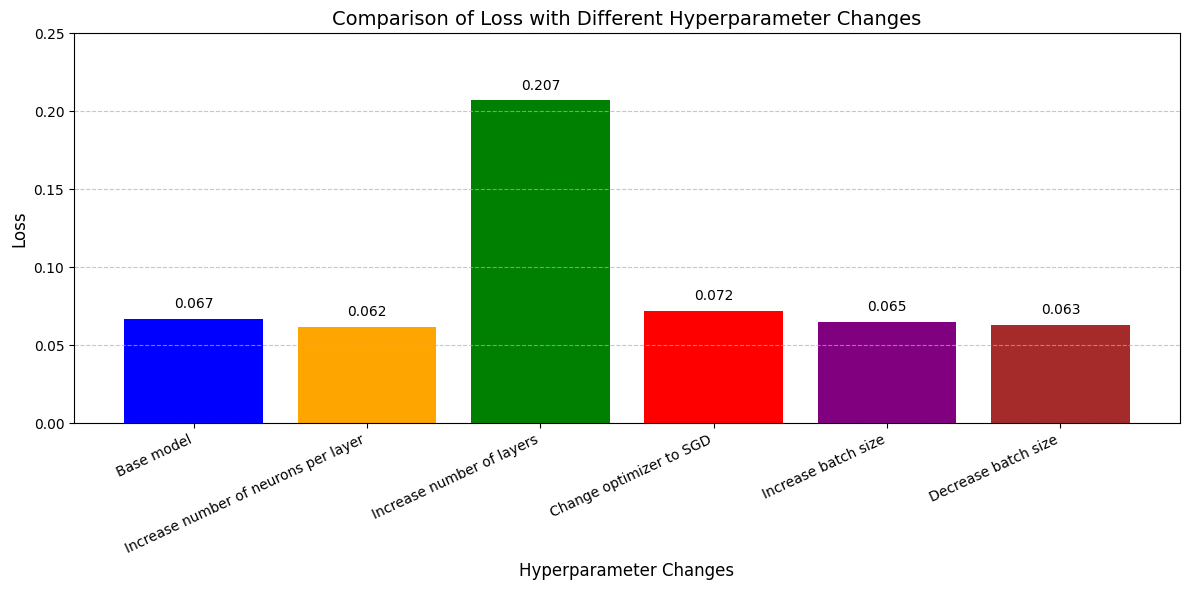

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
changes = [
    'Base model',
    'Increase number of neurons per layer',
    'Increase number of layers',
    'Change optimizer to SGD',
    'Increase batch size',
    'Decrease batch size'
]
losses = [0.067, 0.062, 0.207, 0.072, 0.065, 0.063]

# Creating the bar chart
plt.figure(figsize=(12, 6))  # Adjusted for better readability
bars = plt.bar(changes, losses, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Set y-axis limit with space above the bars
plt.ylim(0, 0.25)  # Adjusted to reflect the range of the 'losses' data

# Add chart labels and title
plt.title('Comparison of Loss with Different Hyperparameter Changes', fontsize=14)
plt.xlabel('Hyperparameter Changes', fontsize=12)
plt.ylabel('Loss', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=25, fontsize=10, ha='right')

# Add a grid for better visual alignment
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        yval + 0.005,  # Add slight space above the bar for the text
        f'{yval:.3f}',  # Format to three decimal places
        ha='center', va='bottom', fontsize=10
    )

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


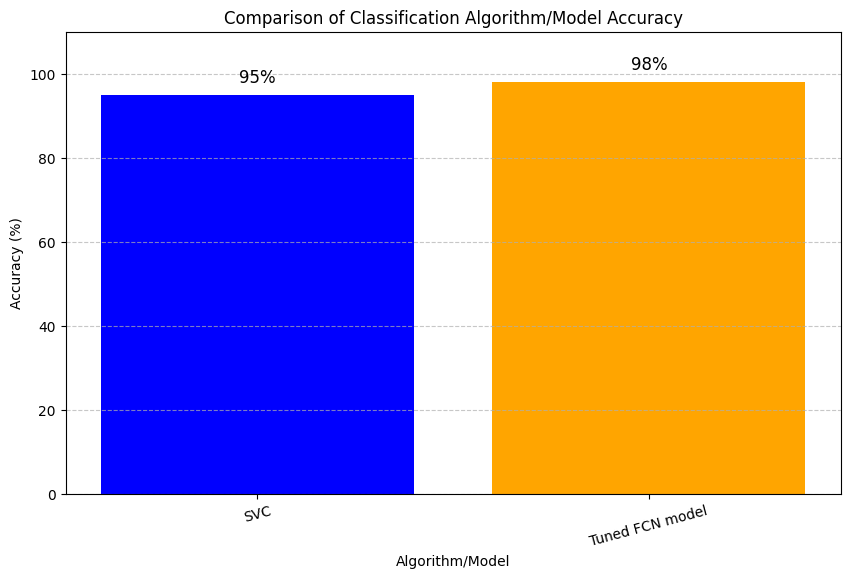

In [ ]:
# Data for plotting
algorithms = ['SVC', 'Tuned FCN model']
accuracies = [95, 98]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracies, color=['blue', 'orange'])
plt.ylim(0, 110)  # Set y-axis limit to give some space above the highest bar
plt.title('Comparison of Classification Algorithm/Model Accuracy')
plt.xlabel('Algorithm/Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding percentages on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2,  # Positioning the text
             f'{yval}%', ha='center', va='bottom', fontsize=12)  # Adding the percentage text

plt.show()
